**<h1 align="center">Principles of Data Analytics</h1>**


# <h1 align="center">Palmer Penguins Exploratory Data Analysis</h1>

***

<p align="center">
<img width="250" height="291" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/palmerpenguins.png")
</p>

[Artwork by @allison_horst](https://allisonhorst.github.io/palmerpenguins/articles/art.html)

## 1.   Introduction

***

The [Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/) by [Allison Horst](https://allisonhorst.com/), [Alison Hill](https://www.apreshill.com/), and [Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) is a dataset for data exploration & visualization, as an alternative to the Iris dataset. It was made available in 2020.

The dataset contains data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

Data was collected from 2007 to 2009 by Dr. Kristen Gorman and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).

More information about the dataset is available in its [official documentation](https://allisonhorst.github.io/palmerpenguins/).

Meet the penguins, who would have thought that three penguins can visually look so different !

<p align="center">
<img width="500" height="350" src="https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/gorman-penguins.jpg")
</p>







## 2.   Imports Libraries

***

We require the following libraries to analyse the dataset.

 - Pandas: Fundamental data analysis and manipulation library built on top of the Python programming language. It offers data structures and operations for manipulating numerical tables and time series.

 - Numpy: It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations.

 - Matplotlib: Essential for creating static, animated, and interactive visualizations in Python. It is closely integrated with NumPy and provides a MATLAB-like interface for creating plots and visualizations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


## 3.   Load data

***

Load the Palmer Penguins data set from a URL

The dataset is available on [GitHub](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded. The dataset can be displayed as follows.

The column heading variables have the following meanings:
- Species: Three penguin species (Adelie, Chinstrap, Gentoo).
- Island: Three islands (Torgersen, Biscoe, Dream).
- Bill_length_mm: penguin’s bill length (mm).
- Bill_depth_mm: penguin’s bill depth (mm).
- Flipper Length (mm): penguin’s flipper length (mm).
- Body Mass (g): penguin’s body mass (g).
- Sex: penguin’s sex.

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 4.   Data Exploration

***

### 4.1 Check for the DataFrame dimensionality with pandas .info() method

**Rationale:** 

The .info() method in Pandas provides valuable insights about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). The info() method does not return any value, it prints the information. [[1]](https://www.w3schools.com/python/pandas/ref_df_info.asp) 

The output of the .info() method consists of several key components: [[2]](https://machinelearningtutorials.org/a-comprehensive-guide-to-using-the-pandas-dataframe-info-method/)

- The total number of rows (entries) in the DataFrame.

- A summary of each column, including:
  - The column name
  - The number of non-null values
  - The data type of the column
  - The memory usage of the column


**Findings:**

From this output, we can gather the following information:

- The DataFrame contains 344 rows and 7 columns.
- The columns are: species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g and sex.
- Some columns have non-null values, indicating that there are missing values in this dataset. Five variables of the columns have missing values.
- Four quantitative variables are numeric with type float64: bill length in mm, bill depth in mm, flipper length in mm, and body mass in grams.
- Three qualitative variables are categorical with type object: species, island, and sex.
- The memory usage of this DataFrame is approximately 18.9 KB.


###### [1] [w3schools Pandas DataFrame info() Method](https://www.w3schools.com/python/pandas/ref_df_info.asp)
###### [2] [Understanding the .info output - Machine Learning Tutorials](https://machinelearningtutorials.org/a-comprehensive-guide-to-using-the-pandas-dataframe-info-method/)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### 4.2 Selecting data by row numbers (.iloc)

**Rationale:** 

The iloc property gets, or sets, the value(s) of the specified indexes. It specifies both row and column with an index. In this example, we look at row 1 in detail. [[3]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

**Findings:**
- Row 1 is a Male Adelie Penguin on Torgersen island.
- Bill Length is 39.1mm, bill depth is 18.7mm
- Flipper Length is 181mm
- Body Mass is 3750g

###### [3] [Pandas Documentation on pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)


In [5]:
df.iloc [0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

### 4.3 Generate descriptive statistics with pandas .describe method

**Rationale:** 

This analysis provides generalized descriptive statistics that summarises the central tendency of the data, the dispersion, and the shape of the dataset’s distribution. It also provides helpful information on missing NaN data. It includes the following statistics: [[4]](https://www.pythonlore.com/exploring-pandas-dataframe-describe-for-descriptive-statistics/)  [[5]](https://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.describe.html)
By default, the describe() function only generates descriptive statistics for numeric columns in a pandas DataFrame. I specifying include='all' which will force pandas to generate summaries for all columns in the dataframe. Some data types don’t have any information. Pandas marks them as NaN.


- Count: This represents the number of non-null (non-empty) values in the dataset for each column.

- Unique: This will show the number of unique values in the column

- Top: Ths will display the most common value in the column

- Frequency: This will show the frequency of the top value within the column.

- Mean: This will display the average value for each column.

- Standard deviation: It indicates how spread out the values are around the mean. A higher standard deviation means the values are more spread out from the mean, while a lower standard deviation means the values are closer to the mean.

- Minimum: It represents the lowest value in each column.

- The default percentiles of the describe function are 25th, 50th, and 75th percentile or (0.25, 0.5, and 0.75).
  
- First quartile (25th percentile): 25% of the data values are below this value.

- Second quartile (50th percentile): It represents the median, the middle value of the dataset.

- Third quartile (75th percentile): 75% of the data values are below this value.

- Maximum: It represents the highest value in the dataset.


**Findings:**

Key interpretations can be made from this function, both for the quantitative and qualitative data. 

Null values: Confirming the observations made from .info, the count of rows does not match the count of values for bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, and sex.

Outliers: body_mass_g max values are greater than the mean, median and 75th percentile, which could indicate the presence of outliers.

Number of classes: sex column contains two categories, while species and islands have three different categories. 

###### [4] [Understanding the Output of pandas.DataFrame.describe](https://www.pythonlore.com/exploring-pandas-dataframe-describe-for-descriptive-statistics/)
###### [5] [Pandas Documentation on pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.describe.html)

In [6]:
df.describe(include='all')


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## 5.   Cleaning the Dataset

***

Before analysis, we must clean the dataset, this might involve removing rows with NaN values, dropping unecessary or constant columns, and improving readability. It is important to understand the sources of missing data. Missing Data can occur when no information is provided for one or more items or for a whole unit. In DataFrames many datasets simply arrive with missing data, either because it exists and was not collected or it never existed. In this dataset, NaN (an acronym for Not a Number) is entered on numerous occasions. Nan is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation [[6]](https://en.wikipedia.org/wiki/IEEE_754). 


###### [6] [IEEE 754: Wikipedia](https://en.wikipedia.org/wiki/IEEE_754)

### 5.1 Working with missing data

Firstly I have used the isnull() method which returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False. To ensure we capture all formats, I have included possible missing value inputs in a list.  [[7]](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)

We can confirm that lines 3 & 339 which have “NaN” were recognized as missing values. Both rows boolean responses are True. But we need to check if there are further missing fields in the dataset,

###### [7] [Data Cleaning with Python and Pandas: Detecting Missing Values](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)

In [7]:
missing_values = ["n/a", "na", "--", "NaN", ""]
df = pd.read_csv(("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"), na_values = missing_values)
df.isnull()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


### 5.2 Identify missing values

Following the isnull() method above, we can confirm that lines 3 & 339 have missing values. But we need to check if there are further missing fields in the dataset, as line 3 & 3369 account for 10 missing/incomplete fields.  [[7]](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b). 
There are 19 missing values in total. 

###### [7] [Data Cleaning with Python and Pandas: Detecting Missing Values](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)

In [8]:
df.isnull().sum().sum()

19

Lets have a look at the total number of missing values for each variable. We can now determine where all of the missing data lies. Line 3 and 339 can be removed. There are also 9 missing values in the variable 'sex'. We need to identify them. 

In [9]:
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

We can also remove the addition lines below from the dataset. We can use .isna() to detect these missing values. The isna() function returns a boolean (True or False) value if the column value is missing. [[8]](https://machinelearningtutorials.org/pandas-isna-function-checking-for-missing-values-with-examples/)

###### [8] [Pandas isna() Function: Checking for Missing Values](https://machinelearningtutorials.org/pandas-isna-function-checking-for-missing-values-with-examples/)

In [10]:
df[df['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


### 5.3 Remove missing values and reset index

We need to drop rows with at least one Nan value (Null value). All # 19 'NaN' values are displayed above in 11 rows. Rows 3, 8 9, 10, 11, 47, 246, 286, 324, 336 and 339 will be removed using the drop function. This function drops the rows selected which have at least one element missing. [[9]](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/).

Following the removal of lines wIth missing values, the data has been reduced to 333 rows and 7 columns. 

As we have dropped a number of rows, we must reset the index of the data set. We will use the function df.reset_index() which will reset the index to default integers starting from 0 and adds the old index values as a new column in the DataFrame. When we reset the index, the old index is added as a column, and a new sequential index is used. To avoid this we can use the drop parameter to ensure the old index is not added as an additional column [[10]](https://www.statology.org/pandas-reset-index-after-dropna/)


###### [9] [Working with Missing Data in Pandas](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas//)

###### [10] [Reset Index in Pandas After Using dropna()](https://www.statology.org/pandas-reset-index-after-dropna/)


In [11]:
df=df.dropna().reset_index(drop=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 5.4 Check the data

Before we move onto the analysis of the data, we need to check and ensure we have successfully cleaned our data set. We can check this using the df.isnull().sum() function.
There are no missing values int he dataset.

In [12]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## 6.   Data Analysis

***

### 6.1 Univariate Analysis

Univariate analysis focuses on understanding each variable in isolation. It’s the simplest form of analyzing data where each variable can be analysed separately. Univariate analysis provides insights into the range, central tendency, dispersion, and shape of the distribution of each variable. [[11]](https://medium.com/@nomannayeem/mastering-exploratory-data-analysis-eda-a-comprehensive-python-pandas-guide-for-data-insights-c0be7c5b8889)

Techniques for Univariate Analysis:

 - Histograms: Excellent for visually representing the distribution of a single continuous variable.
 - Box Plots: Valuable for identifying outliers and grasping the data's dispersion.
 - Count Plots: Ideal for categorical data, illustrating the frequency of each category.
 - Pie Charts: Visually engaging method to display the proportion of categories within a variable.
 - Bar Charts: Another effective means of depicting the frequency distribution of categorical data.

I will be creating a bar chart and a a histogram of a variable in the data set for Task 4. I will be taking a stateless approach. The key difference between stateful and stateless is whether an application retains information about the current state of a user's interactions or if it treats each request as an independent, isolated transaction. The advantages of a stateless approach are scalability, fault tolerant, lower resources and simplicity. It was recommended during Week 8: Video 4 '08_best_fit' to use a stateless approach [[12]](https://realpython.com/lessons/stateful-vs-stateless-approach/) [[13]](https://www.redhat.com/en/topics/cloud-native-apps/stateful-vs-stateless) [[14]](https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian_mcloughlin_atu_ie%2FDocuments%2Fstudent_shares%2Fprinciples_of_data_analytics%2F08_best_fit%2Ft08v04_best_fit%2Emkv&referrer=OneDriveForBusiness&referrerScenario=OpenFile)


###### [11] [Mastering Exploratory Data Analysis (EDA): A Comprehensive Python (Pandas) Guide for Data Insights and Storytelling](https://medium.com/@nomannayeem/mastering-exploratory-data-analysis-eda-a-comprehensive-python-pandas-guide-for-data-insights-c0be7c5b8889)
###### [12] [Real Python: Stateful vs Stateless Approach](https://realpython.com/lessons/stateful-vs-stateless-approach/)

###### [13] [Stateful vs stateless - Explained](https://www.redhat.com/en/topics/cloud-native-apps/stateful-vs-stateless)

###### [14] [Lecture 8: Video 4 - Ian McLoughlin -recommendation on stateless approach](https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian_mcloughlin_atu_ie%2FDocuments%2Fstudent_shares%2Fprinciples_of_data_analytics%2F08_best_fit%2Ft08v04_best_fit%2Emkv&referrer=OneDriveForBusiness&referrerScenario=OpenFile)

#### 6.1.1 Bar Chart (Task 4)






**Rationale:** 

Firstly, I want to explore the categorical variable of species and determine what is teh most popular species of penguin.

**Findings:** 

The bar chart represents the number of each penguin species. Each bar in the below chart represents a different species. Each species is colour coded - The "Adelie" penguins are represented by a dark orange bar, "Chinstrap" penguins by a teal bar, and "Gentoo" penguins by a medium orchid bar. These colours are represented in the artwork created by @allison_horst below.
The chart illustrates clearly the distribution of penguins across the three species. The "Adelie" penguins have the highest count of the three species, followed by the "Chinstrap" penguins and lastly the "Gentoo" penguins. The most common species of penguin is a "Adeilie".


[] [Python Guides on Matplotlib plot bar chart](https://pythonguides.com/matplotlib-plot-bar-chart/)

[] [Control the color of barplots built with matplotlib](https://python-graph-gallery.com/3-control-color-of-barplots/)

[] [Colour Chart](https://matplotlib.org/stable/users/explain/colors/colors.html)

[] [Python Graph Gallery-Custom Matplotlib Title](https://python-graph-gallery.com/190-custom-matplotlib-title/)

[] [Pythonspot:Matplotlib legend](https://pythonspot.com/matplotlib-legend/)

<p align="center">
<img width="528" height="291" src="img/lter_penguins.png")
</p>

[Artwork by @allison_horst](https://allisonhorst.github.io/palmerpenguins/articles/art.html)

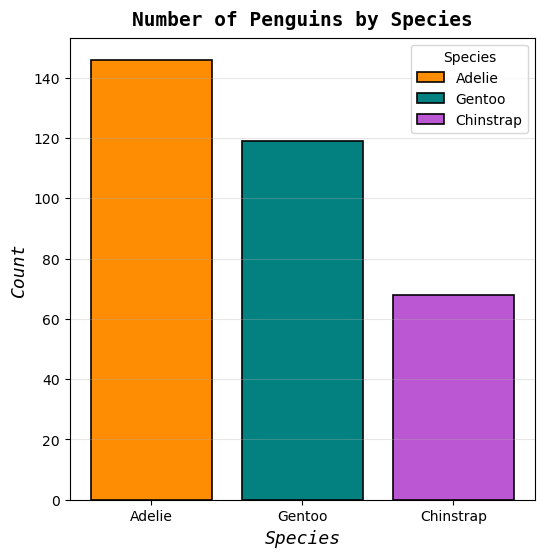

In [13]:
species_counts = df['species'].value_counts()           # Define the Dataframe

width = 0.6
colours = [ "darkorange","teal","mediumorchid"]                         # Define colours for each species

fig, ax = plt.subplots(figsize=(6, 6))                  # Create figure and axes objects

ax.bar(species_counts.index,                            # Plot bar chart for species x-axis
        species_counts,                                 # and for species count on y-axis
        edgecolor="black",                              # set edge colour
        lw = 1.20,                                      # The lw (line width) can be increased
        alpha = 0.99,                                   # The alpha parameter sets the transparency of the bars.
        label=species_counts.index,                     # set the label for each bar
        color=colours,                                  # set the label for each bar
        )

ax.set_title("Number of Penguins by Species",           # Sets the title name
        fontsize=14,                                    # font size = controls the size of the font and sets it to 18.
        loc="center",                                   # loc = The location of the title can be ‘center’, ‘left’, ‘right’.
        horizontalalignment="center",                   # You can adjust with horizontal alignment ('center', 'right', 'left').
        verticalalignment="bottom",                     # the vertical alignment ('top', 'bottom', 'center', 'baseline')
        fontweight="bold",                              # font weight = controls the weight of the font - bold                      
        family="monospace"                              # family = controls the font family of the font - monospace
        )   

ax.set_xlabel("Species",                                # Sets the label for the x-axis
        fontsize=13,                                    # font size = controls the size of the font and sets it to 15
        style="italic",                                 # style = controls the style of the font - italic
        family="monospace"                              # family = controls the font family of the font - monospace
        )                                         

ax.set_ylabel("Count",                                  # Sets the label for the y-axis
        fontsize=13,                                    # font size = controls the size of the font and sets it to 15
        style="italic",                                 # style = controls the style of the font - italic
        family="monospace"                              # family = controls the font family of the font - monospace
        )  

ax.set_xticklabels(species_counts.index,                # Sets the label to be displayed on the x-axis tick labels
        fontsize=10,                                    # Sets the font size of the x-axis tick labels to 10.
        ha='center'                                     # Sets the horizontal alignment of the tick labels
        )

ax.grid(axis='y',                                       # Set a grid
        alpha=0.30,                                     # with transparency of 0.30
        )

ax.legend(title='Species',                              # Set title
        loc="best",                                     # location options are 'best'
        )                                      


#### 6.2.1 Stacked Bar Chart


**Rationale:** 

Following the above analysis, it might be interesting to show the count of penguin species on each island. I started with pulling the data from the dataset followed by a stacked bar chart. 

**Findings:** 

The stacked bar chart shows us the total quantity of penguins on each island while also telling us which species inhabitate that island. Each bar represents a different species, stacked on top of each other for each island. The stacked bar graph below depicts that the "Adelie" penguin resides on all three islands and obviously moves around. The other two species "Gentoo" and "Chinstrap" reside solely on one island each. 
The data shows that the "Chinstrap" and "Gentoo" species stick to a single island namely the "Biscoe" and "Dream" islands respectively. This may be due to their body mass and biological makeup which makes surviving on other islands difficult. Only the "Adelie" species can inhabit all islands which may also be due to its body mass. 


[] [Matplotlib: Stacked Bar Chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py)

[] [Charts from Dataframe Plot stacked bar graph in one line using Pandas](https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3)

[] [Pandas Documentation on pandas.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

[] [Pandas: Create Pivot Table with Multiple aggfunc](https://www.statology.org/pandas-pivot-table-multiple-aggfunc/0)

[] [Stack Overflow: python pandas pivot_table count frequency in one column - issue with using "count"](https://stackoverflow.com/questions/22412033/python-pandas-pivot-table-count-frequency-in-one-column)

[] [Matplotlib: Bar Label Demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py)

In [14]:
species_count = df.groupby(['island', 'species']).size().unstack()
species_count

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44.0,NaN,119.0
Dream,55.0,68.0,NaN
Torgersen,47.0,NaN,NaN


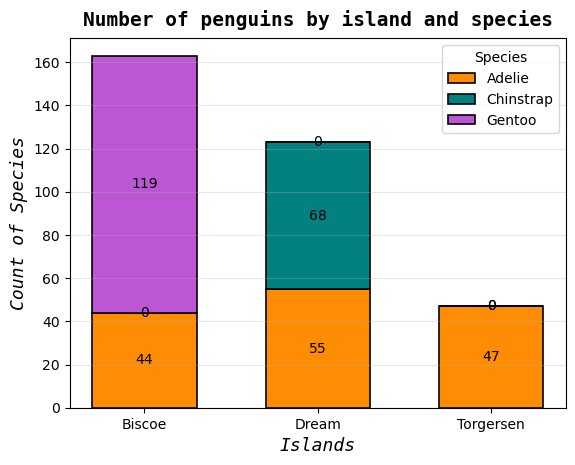

In [15]:
pivot_table = df.pivot_table(index='island',            # Pivot the dataframe to create a table x = islands
                        columns='species',              # and for species count on y-axis
                        aggfunc='size',                 # this specifies the aggregation function of "size" to be applied. See reference []
                        fill_value=0)                   # Specifies the value to be used for any missing entries=0.

island = pivot_table.index                              # Convert the index 
species_counts = pivot_table.values                     # and columns to arrays
#print (island)                                         # Test print and comment out
#print (species_counts)                                 # Test print and comment out
#print(pivot_table.columns)                             # Test print and comment out

colours = [ "darkorange","teal","mediumorchid"]         # Define colours for each species

fig, ax = plt.subplots()                                # Create the plot

bottom = np.zeros(len(island))                          # Initialize bottom values for stacking bars

for i, species in enumerate(pivot_table.columns):       # iterates over the columns of the pivot table, 
                                                        # assigning each column index to i and the column 
                                                        # label (species) to species.

        p = ax.bar(island,                              # Plot teh stacked bar chart for x-axis=island
        species_counts[:, i],                           # height of the bar for species
        width,                                          # width of the bar
        label=species,                                  # set the label for each bar
        bottom=bottom, 
        edgecolor="black",                              # set edge colour
        lw = 1.20,                                      # The lw (line width) can be increased
        alpha = 0.99,                                   # The alpha parameter sets the transparency of the bars.
        color=colours[i])                               # set the label for each bar

        bottom += species_counts[:, i]                  # this line creates the stacked bar. 
                                                        # This line updates the bottom variable so that the next species' bars start 
                                                        # where the previous species' bars ended, ensuring that they are stacked.

        ax.bar_label(p, label_type='center')

ax.set_title("Number of penguins by island and species",    # Sets the title name
        fontsize=14,                                    # font size = controls the size of the font and sets it to 18.
        loc="center",                                   # loc = The location of the title can be ‘center’, ‘left’, ‘right’.
        horizontalalignment="center",                   # You can adjust with horizontal alignment ('center', 'right', 'left').
        verticalalignment="bottom",                     # the vertical alignment ('top', 'bottom', 'center', 'baseline')
        fontweight="bold",                              # font weight = controls the weight of the font - bold                      
        family="monospace"                              # family = controls the font family of the font - monospace
        )   

ax.set_xlabel("Islands",                                # Sets the label for the x-axis
        fontsize=13,                                    # font size = controls the size of the font and sets it to 15
        style="italic",                                 # style = controls the style of the font - italic
        family="monospace"                              # family = controls the font family of the font - monospace
        )                                         

ax.set_ylabel("Count of Species",                       # Sets the label for the y-axis
        fontsize=13,                                    # font size = controls the size of the font and sets it to 15
        style="italic",                                 # style = controls the style of the font - italic
        family="monospace"                              # family = controls the font family of the font - monospace
        )  

ax.grid(axis='y',                                       # Set a grid
        alpha=0.30,                                     # with transparency of 0.30
        )

ax.legend(title='Species',                              # Set title
        loc="best",                                     # location options are 'best'
        )                                  


#### 6.1.3  Histogram (Task 4)

**Rationale:** 

I would like to investigate the flipper length by using a histogram which will illustrate a graphical summary of teh data.


**Findings:** 

The flipper length is quite varied and would require another variable to make any useful analysis.


[] [Python Histogram Plotting: NumPy, Matplotlib, pandas & Seaborn](https://realpython.com/python-histograms/)

[] [Histograms in Matplotlib](https://www.datacamp.com/tutorial/histograms-matplotlib)

[] [Statology:How to Modify a Matplotlib Histogram Color (With Examples)](https://www.statology.org/matplotlib-histogram-color/)



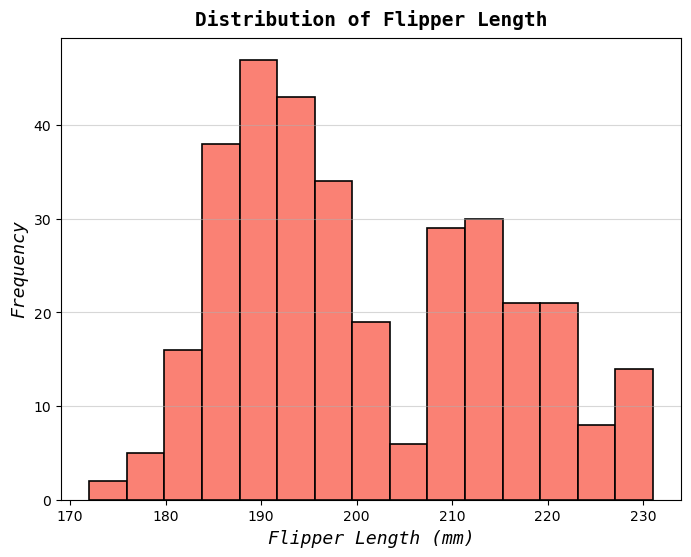

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram for flipper length
ax.hist(df["flipper_length_mm"],                        # Plot histogram chart for flipper length on x-axis
        bins=15,                                        # set bin sizes
        color="salmon",                                 # set colour
        edgecolor="black",                              # set edge colour
        lw = 1.20,                                      # The lw (line width) can be increased
        alpha = 0.99,                                   # The alpha parameter sets the transparency of the bars.
        )

ax.set_title("Distribution of Flipper Length",             # Sets the title name
        fontsize=14,                                    # font size = controls the size of the font and sets it to 18.
        loc="center",                                   # loc = The location of the title can be ‘center’, ‘left’, ‘right’.
        horizontalalignment="center",                   # You can adjust with horizontal alignment ('center', 'right', 'left').
        verticalalignment="bottom",                     # the vertical alignment ('top', 'bottom', 'center', 'baseline')
        fontweight="bold",                              # font weight = controls the weight of the font - bold                      
        family="monospace"                              # family = controls the font family of the font - monospace
        )   

ax.set_xlabel("Flipper Length (mm)",                    # Sets the label for the x-axis
        fontsize=13,                                    # font size = controls the size of the font and sets it to 15
        style="italic",                                 # style = controls the style of the font - italic
        family="monospace"                              # family = controls the font family of the font - monospace
        )                                         

ax.set_ylabel("Frequency",                              # Sets the label for the y-axis
        fontsize=13,                                    # font size = controls the size of the font and sets it to 15
        style="italic",                                 # style = controls the style of the font - italic
        family="monospace"                              # family = controls the font family of the font - monospace
        )  

ax.grid(axis='y',                                       # Set a grid
        alpha=0.50,                                     # with transparency of 0.50
        )

#ax.legend(title='Flipper Length (mm)',                 # No legend needs as one variable / Flipper Length (mm)
        #loc="best",                                     # location options are 'best'
        #)           


### 6.2 Bivariate Analysis

https://www.statology.org/bivariate-analysis-in-python/

There are three common ways to perform bivariate analysis:

1. Scatterplots

2. Correlation Coefficients

3. Simple Linear Regression
   
4. Bar Chart visualised using a stacked bar chart.

https://medium.com/@Fortune_/visualizing-the-palmerpenguins-dataset-d3d70bb619b4
The relationship between bill length and bill depth

[] [Datagy:Calculate and Plot a Correlation Matrix in Python and Pandas](https://datagy.io/python-correlation-matrix/)

### 6.2.1 Mean of Data

Before we bgine lets get hte mean data

Adelie has significant short Culmen Length at a mean of 38.79mm as compared to 48.79mm and 18.42mm for Chinstrap and Gentoo penguins
Culmen Length data is important to distinguish Adelie penguins
Gentoo has the smallest Culmen Depth at a mean of 14.99mm compared to 18.32mm and 18.40mm of Adelie and Chinstrap penguins.

### 6.2.2 Bill Length vs Bill Depth

**Rationale:** 

Let's see if there is any correlation between Bill Length and Bill Depth:
Before we move onto the analysis, this is how bill length and depth were actually measured. Luckily, Allison Horst drew up some illustrations to help explain this. Here is one for bill measurement:


<p align="center">
<img width="428" height="291" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png")
</p>

[Artwork by @allison_horst](https://allisonhorst.github.io/palmerpenguins/articles/art.html)


**Findings:** Without a regression line it is hard to tell if there is any real regression. 



(10.0, 25.0)

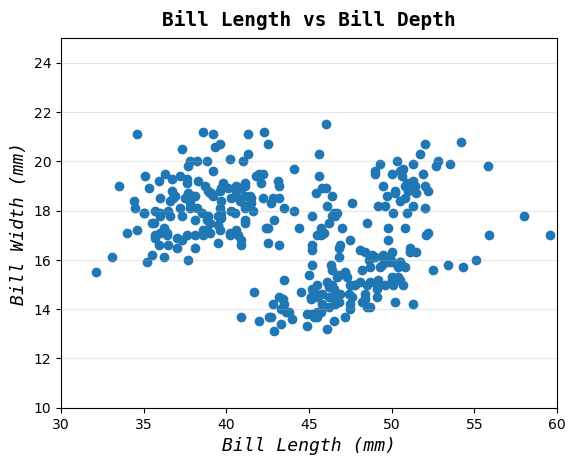

In [17]:
# Bill Length vs Bill Depth

bill_length = df["bill_length_mm"]
bill_depth = df["bill_depth_mm"]
#print (bill_length)
#print (bill_depth)

fig, ax = plt.subplots()

ax.scatter(bill_length, bill_depth)                         # Simple plot

ax.set_title("Bill Length vs Bill Depth",                   # Sets the title name
        fontsize=14,                                        # font size = controls the size of the font and sets it to 18.
        loc="center",                                       # loc = The location of the title can be ‘center’, ‘left’, ‘right’.
        horizontalalignment="center",                       # You can adjust with horizontal alignment ('center', 'right', 'left').
        verticalalignment="bottom",                         # the vertical alignment ('top', 'bottom', 'center', 'baseline')
        fontweight="bold",                                  # font weight = controls the weight of the font - bold                      
        family="monospace"                                  # family = controls the font family of the font - monospace
        )   

ax.set_xlabel("Bill Length (mm)",                           # Sets the label for the x-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )                                         

ax.set_ylabel("Bill Width (mm)",                            # Sets the label for the y-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )  

ax.grid(axis='y',                                           # Set a grid
        alpha=0.30,                                         # with transparency of 0.30
        )

ax.set_xlim(30,60)                                          # x limits

ax.set_ylim(10,25)                                          # y limits


### 6.2.3 Bill Length vs Bill Depth with Regression Line

**Rationale:** 

Without a regression line it is hard to tell if there is any real regression. So we need to add one.

**Findings:** 

We can see from the below graph - the negative slope of the regression line indicates a negative correlation, suggesting that as bill length increases, bill depth tends to decrease.  We need to go deeper into the analysis by species and sex.


In [18]:
coefficients = np.polyfit(bill_length, bill_depth, 1)
m = coefficients[0]  # Slope
c = coefficients[1]  # Intercept
print (m,c)
    

-0.08232675339862279 20.786648668433816


(10.0, 25.0)

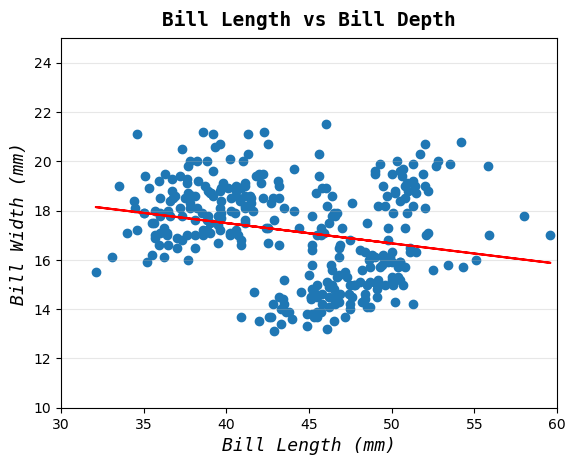

In [19]:
# Bill Length vs Bill Depth with Regression Line

bill_length = df["bill_length_mm"]
bill_depth = df["bill_depth_mm"]
#print (bill_length)
#print (bill_depth)

fig, ax = plt.subplots()

ax.scatter(bill_length, bill_depth)                             # Simple plot

ax.plot (bill_length,  m * bill_length + c,"r-")                # Add line (r = red  / - = line)

ax.set_title("Bill Length vs Bill Depth",                   # Sets the title name
        fontsize=14,                                        # font size = controls the size of the font and sets it to 18.
        loc="center",                                       # loc = The location of the title can be ‘center’, ‘left’, ‘right’.
        horizontalalignment="center",                       # You can adjust with horizontal alignment ('center', 'right', 'left').
        verticalalignment="bottom",                         # the vertical alignment ('top', 'bottom', 'center', 'baseline')
        fontweight="bold",                                  # font weight = controls the weight of the font - bold                      
        family="monospace"                                  # family = controls the font family of the font - monospace
        )   

ax.set_xlabel("Bill Length (mm)",                           # Sets the label for the x-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )                                         

ax.set_ylabel("Bill Width (mm)",                            # Sets the label for the y-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )  

ax.grid(axis='y',                                           # Set a grid
        alpha=0.30,                                         # with transparency of 0.30
        )

ax.set_xlim(30,60)                                          # x limits

ax.set_ylim(10,25)                                          #y limits



Let’s check the correlation between length and depth for each species.

https://dlsun.github.io/stats112/slides/grammar_of_graphics.pdf

In [20]:
df.groupby("species")[["bill_depth_mm","bill_length_mm"]].corr()

bill_depth_mm  bill_length_mm
species                                                
Adelie    bill_depth_mm        1.000000        0.385813
          bill_length_mm       0.385813        1.000000
Chinstrap bill_depth_mm        1.000000        0.653536
          bill_length_mm       0.653536        1.000000
Gentoo    bill_depth_mm        1.000000        0.654023
          bill_length_mm       0.654023        1.000000

To summarize the relationship, we calculate the correlation coefficient R.
The overall correlation between length and depth was negative!
Culmen Length vs. Culmen Depth: Weak negative correlation (r = -0.23)
This implies that as culmen length increases, there is a slight tendency for culmen depth to decrease, although the correlation isn’t particularly strong.

In [21]:
df[["bill_length_mm", "bill_depth_mm"]].corr()

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,-0.228626
bill_depth_mm,-0.228626,1.000000


### 6.2.4 Bill Length vs Bill Depth by Species


**Rationale:** 

The scattered spread of points around the regression line suggests a weaker correlation. This observation prompts us to investigate whether the inclusion of all penguin species contributes to this variability. Let's examine the relationship separately for each species. 

**Findings:** 

The scatter below illustrates a positive correlation between Bill Depth and Bill Length across all species. As Bill Length increases, so does Bill Depth.

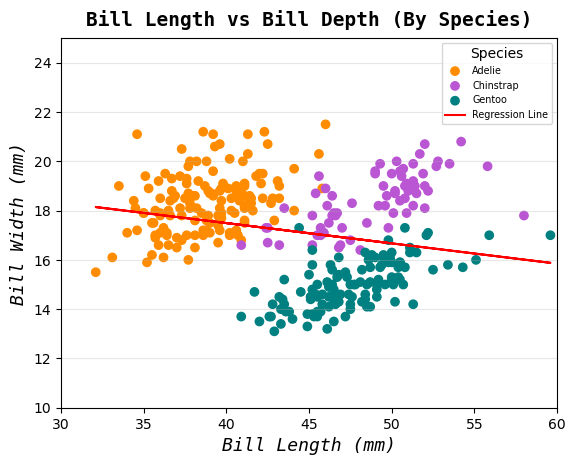

In [22]:
# Bill Length vs Bill Depth with Regression Line by Species
# I represent the third variable with colour

bill_length = df["bill_length_mm"]
bill_depth = df["bill_depth_mm"]
species = df["species"]

#print (bill_length)
#print (bill_depth)
#print (species)

#coefficients = np.polyfit(bill_length, bill_depth, 1)
#m = coefficients[0]  # Slope
#c = coefficients[1]  # Intercept

# We need to assign colors to each data point based on the species while plotting. We'll iterate over each species and plot its data with the corresponding color.

fig, ax = plt.subplots()

# # Loop through each unique species and plot its data separately with its assigned color
for spec in species.unique():
        ax.scatter(bill_length[species == spec], bill_depth[species == spec], c=species.map({"Adelie":"darkorange", "Gentoo":"teal", "Chinstrap":"mediumorchid"}).loc[species == spec], label=spec)

# In this code, I've adjusted the c argument of the scatter function to ensure that it only takes 
# colors corresponding to the data points of each species, which should resolve the mismatch error. 
# Let me know if you need further assistance!
# ax.scatter(bill_length, bill_depth)


# Add line (r = red  / - = line)
ax.plot(bill_length, m * bill_length + c, "r-", label="Regression Line")

ax.set_title("Bill Length vs Bill Depth (By Species)",      # Sets the title name
        fontsize=14,                                        # font size = controls the size of the font and sets it to 18.
        loc="center",                                       # loc = The location of the title can be ‘center’, ‘left’, ‘right’.
        horizontalalignment="center",                       # You can adjust with horizontal alignment ('center', 'right', 'left').
        verticalalignment="bottom",                         # the vertical alignment ('top', 'bottom', 'center', 'baseline')
        fontweight="bold",                                  # font weight = controls the weight of the font - bold                      
        family="monospace"                                  # family = controls the font family of the font - monospace
        )   

ax.set_xlabel("Bill Length (mm)",                           # Sets the label for the x-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )                                         

ax.set_ylabel("Bill Width (mm)",                            # Sets the label for the y-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )  

ax.grid(axis='y',                                           # Set a grid
        alpha=0.30,                                         # with transparency of 0.30
        )

ax.set_xlim(30,60)                                          # x limits

ax.set_ylim(10,25)                                          # y limits                                                                

ax.legend(title='Species',                                  # Add legend with title Species
        loc="best",                                          # and in the best location
        fontsize='x-small'                                    # set fontsize to small
        )


https://github.com/briannemcgrath/Principles-of-Data-Analytics/blob/main/penguins.ipynb

### 6.2.5 Bill Length vs Bill Depth by Species with Regression Line per Species

**Rationale:** 

Lets illustrate the above with a regression line per species. 

**Findings:** 

For the "Adelie" and "Gentoo" species, as bill length increases, bill depth also increases. For the "Chinstrap" species, the correlation between bill depth and length
thins out at some point with both variables being unrelated when bill width inches around 20mm.

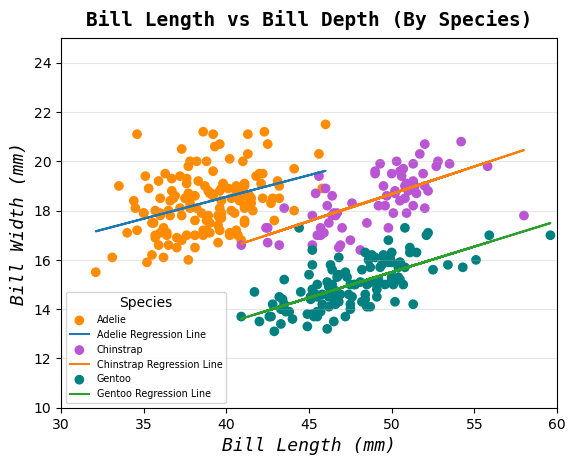

In [23]:
# Bill Length vs Bill Depth with Regression Line by Species
# I represent the third variable with colour

bill_length = df["bill_length_mm"]
bill_depth = df["bill_depth_mm"]
species = df["species"]

#print (bill_length)
#print (bill_depth)
#print (species)


# We need to assign colors to each data point based on the species while plotting. We'll iterate over each species and plot its data with the corresponding color.

fig, ax = plt.subplots()

# # Loop through each unique species and plot its data separately with its assigned color
for spec in species.unique():
        # Filter data for the current species
    spec_data = df[df['species'] == spec]
    bill_length_spec = spec_data["bill_length_mm"]
    bill_depth_spec = spec_data["bill_depth_mm"]
    
# Calculate the coefficients of the regression line for the current species
    coefficients = np.polyfit(bill_length_spec, bill_depth_spec, 1)
    m = coefficients[0]  # Slope
    c = coefficients[1]  # Intercept
    
    
# Plot the scatter plot and regression line for the current species  
    ax.scatter(bill_length_spec, bill_depth_spec, c=species.map({"Adelie":"darkorange", "Gentoo":"teal", "Chinstrap":"mediumorchid"}).loc[species == spec], label=spec)
    
    ax.plot(bill_length_spec, m * bill_length_spec + c, "-", label=f"{spec} Regression Line")

# In this code, I've adjusted the c argument of the scatter function to ensure that it only takes 
# colors corresponding to the data points of each species, which should resolve the mismatch error. 
# Let me know if you need further assistance!
# ax.scatter(bill_length, bill_depth)


# Add line (r = red  / - = line)
#ax.plot(bill_length, m * bill_length + c, "r-", label="Regression Line")

ax.set_title("Bill Length vs Bill Depth (By Species)",      # Sets the title name
        fontsize=14,                                        # font size = controls the size of the font and sets it to 18.
        loc="center",                                       # loc = The location of the title can be ‘center’, ‘left’, ‘right’.
        horizontalalignment="center",                       # You can adjust with horizontal alignment ('center', 'right', 'left').
        verticalalignment="bottom",                         # the vertical alignment ('top', 'bottom', 'center', 'baseline')
        fontweight="bold",                                  # font weight = controls the weight of the font - bold                      
        family="monospace"                                  # family = controls the font family of the font - monospace
        )   

ax.set_xlabel("Bill Length (mm)",                           # Sets the label for the x-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )                                         

ax.set_ylabel("Bill Width (mm)",                            # Sets the label for the y-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )  

ax.grid(axis='y',                                           # Set a grid
        alpha=0.30,                                         # with transparency of 0.30
        )

ax.set_xlim(30,60)                                          # x limits

ax.set_ylim(10,25)                                          # y limits                                                                

ax.legend(title='Species',                                  # Add legend with title Species
        loc="best",                                         # and in the best location
        fontsize='x-small'                                  # set fontsize to small
        )


### 6.2.6 Bill Length vs Bill Depth with Regression Line for Male / Female Species

**Rationale:** 

Let's compare the relationship between Bill Length and Bill Depth for the Male and Female penguins. We'll analyse seperate scatter plots for males and females to discern any differences in the correlation between these variables based on sex. Our aim is to understand if there are distinct patterns in bill characteristics between the two sexes.

**Findings:** 



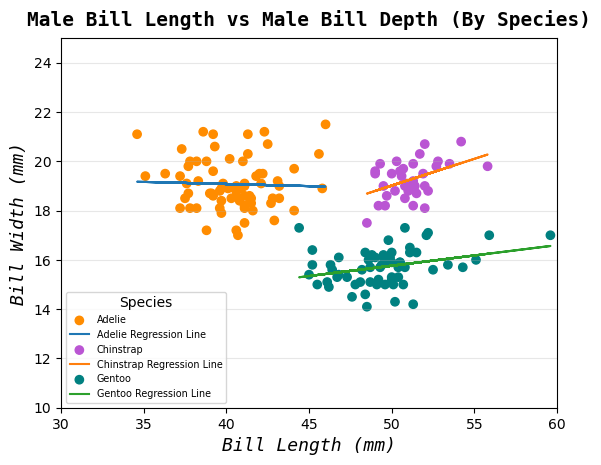

In [24]:
# Bill Length vs Bill Depth with Regression Line Male Species
# I represent the third variable with colour

male_data = df[df['sex'] == 'MALE']
bill_length_male = male_data["bill_length_mm"]
bill_depth_male = male_data["bill_depth_mm"]
species_male = male_data["species"]
#print (male_data)
#print (bill_length_male)
#print (bill_depth_male)
#print (species_male)

# We need to assign colors to each data point based on the species while plotting. We'll iterate over each species and plot its data with the corresponding color.

fig, ax = plt.subplots()

# Loop through each unique species and plot its data separately with its assigned color
for spec in species_male.unique():
    # Filter data for the current species and male sex
    spec_data = male_data[male_data['species'] == spec]
    bill_length_spec = spec_data["bill_length_mm"]
    bill_depth_spec = spec_data["bill_depth_mm"]
    
# Calculate the coefficients of the regression line for the current species
    coefficients = np.polyfit(bill_length_spec, bill_depth_spec, 1)
    m = coefficients[0]  # Slope
    c = coefficients[1]  # Intercept
    
    
# Plot the scatter plot and regression line for the current species  
    #ax.scatter(bill_length_spec, bill_depth_spec, c=species.map({"Adelie":"red", "Gentoo":"blue", "Chinstrap":"grey"}).loc[species == spec], label=spec)
    ax.scatter(bill_length_spec, bill_depth_spec, c=spec_data['species'].map({"Adelie":"darkorange", "Gentoo":"teal", "Chinstrap":"mediumorchid"}).loc[species == spec], label=spec)
    
    ax.plot(bill_length_spec, m * bill_length_spec + c, "-", label=f"{spec} Regression Line")

# In this code, I've adjusted the c argument of the scatter function to ensure that it only takes 
# colors corresponding to the data points of each species, which should resolve the mismatch error. 
# Let me know if you need further assistance!
# ax.scatter(bill_length, bill_depth)


# Add line (r = red  / - = line)
#ax.plot(bill_length, m * bill_length + c, "r-", label="Regression Line")

ax.set_title("Male Bill Length vs Male Bill Depth (By Species)",      # Sets the title name
        fontsize=14,                                        # font size = controls the size of the font and sets it to 18.
        loc="center",                                       # loc = The location of the title can be ‘center’, ‘left’, ‘right’.
        horizontalalignment="center",                       # You can adjust with horizontal alignment ('center', 'right', 'left').
        verticalalignment="bottom",                         # the vertical alignment ('top', 'bottom', 'center', 'baseline')
        fontweight="bold",                                  # font weight = controls the weight of the font - bold                      
        family="monospace"                                  # family = controls the font family of the font - monospace
        )   

ax.set_xlabel("Bill Length (mm)",                           # Sets the label for the x-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )                                         

ax.set_ylabel("Bill Width (mm)",                            # Sets the label for the y-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )  

ax.grid(axis='y',                                           # Set a grid
        alpha=0.30,                                         # with transparency of 0.30
        )

ax.set_xlim(30,60)                                          # x limits

ax.set_ylim(10,25)                                          # y limits                                                                

ax.legend(title='Species',                                  # Add legend with title Species
        loc="best",                                         # and in the best location
        fontsize='x-small'                                  # set fontsize to small
        )


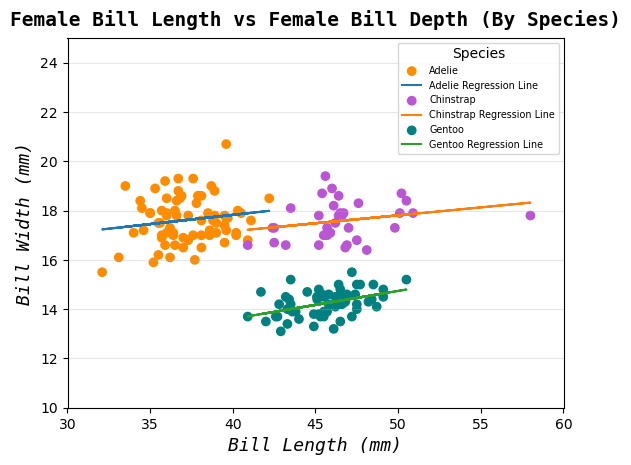

In [25]:
# Bill Length vs Bill Depth with Regression Line by Female Species
# I represent the third variable with colour

female_data = df[df['sex'] == 'FEMALE']
bill_length_female = female_data["bill_length_mm"]
bill_depth_female = female_data["bill_depth_mm"]
species_female = female_data["species"]
#print (female_data)
#print (bill_length_female)
#print (bill_depth_female)
#print (species_female)

# We need to assign colors to each data point based on the species while plotting. We'll iterate over each species and plot its data with the corresponding color.

fig, ax = plt.subplots()

# Loop through each unique species and plot its data separately with its assigned color
for spec in species_female.unique():
    # Filter data for the current species and female sex
    spec_data = female_data[female_data['species'] == spec]
    bill_length_spec = spec_data["bill_length_mm"]
    bill_depth_spec = spec_data["bill_depth_mm"]
    
# Calculate the coefficients of the regression line for the current species
    coefficients = np.polyfit(bill_length_spec, bill_depth_spec, 1)
    m = coefficients[0]  # Slope
    c = coefficients[1]  # Intercept
    
    
# Plot the scatter plot and regression line for the current species  
    #ax.scatter(bill_length_spec, bill_depth_spec, c=species.map({"Adelie":"red", "Gentoo":"blue", "Chinstrap":"grey"}).loc[species == spec], label=spec)
    ax.scatter(bill_length_spec, bill_depth_spec, c=spec_data['species'].map({"Adelie":"darkorange", "Gentoo":"teal", "Chinstrap":"mediumorchid"}).loc[species == spec], label=spec)
    
    ax.plot(bill_length_spec, m * bill_length_spec + c, "-", label=f"{spec} Regression Line")

# In this code, I've adjusted the c argument of the scatter function to ensure that it only takes 
# colors corresponding to the data points of each species, which should resolve the mismatch error. 
# Let me know if you need further assistance!
# ax.scatter(bill_length, bill_depth)


# Add line (r = red  / - = line)
#ax.plot(bill_length, m * bill_length + c, "r-", label="Regression Line")

ax.set_title("Female Bill Length vs Female Bill Depth (By Species)",      # Sets the title name
        fontsize=14,                                        # font size = controls the size of the font and sets it to 18.
        loc="center",                                       # loc = The location of the title can be ‘center’, ‘left’, ‘right’.
        horizontalalignment="center",                       # You can adjust with horizontal alignment ('center', 'right', 'left').
        verticalalignment="bottom",                         # the vertical alignment ('top', 'bottom', 'center', 'baseline')
        fontweight="bold",                                  # font weight = controls the weight of the font - bold                      
        family="monospace"                                  # family = controls the font family of the font - monospace
        )   

ax.set_xlabel("Bill Length (mm)",                           # Sets the label for the x-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )                                         

ax.set_ylabel("Bill Width (mm)",                            # Sets the label for the y-axis
        fontsize=13,                                        # font size = controls the size of the font and sets it to 15
        style="italic",                                     # style = controls the style of the font - italic
        family="monospace"                                  # family = controls the font family of the font - monospace
        )  

ax.grid(axis='y',                                           # Set a grid
        alpha=0.30,                                         # with transparency of 0.30
        )

ax.set_xlim(30,60)                                          # x limits

ax.set_ylim(10,25)                                          # y limits                                                                

ax.legend(title='Species',                                  # Add legend with title Species
        loc="best",                                         # and in the best location
        fontsize='x-small'                                  # set fontsize to small
        )


In [26]:
'''
# Fit a straight line between x and y

m,c = np.polyfit (bill_length, bill_depth, 1)

# Print m, c

print (m,c)
'''

    

'\n# Fit a straight line between x and y\n\nm,c = np.polyfit (bill_length, bill_depth, 1)\n\n# Print m, c\n\nprint (m,c)\n'

$ y = mx + c = p_1 x^1 + p_0 = p_1  x + p_0$

## End

***

### S

**Rationale:** 



**Findings:**

### S

**Rationale:** 


**Findings:**

### 

**Rationale:** 


**Findings:**

### 

**Rationale:** 


**Findings:**

[© Gabe Mednick 2022](https://www.gabemednick.com/post/penguin/featured_hu23a2ff6767279debab043a6c8f0a6157_878472_720x0_resize_lanczos_2.png)

***

<p align="center">
<img width="250" height="291" src="https://miro.medium.com/v2/resize:fit:4800/format:webp/0*UG26YZBOOrH0jQk3")
</p>

Photo by [Tam Minton](https://unsplash.com/ja/@tamwarnerminton?utm_source=medium&utm_medium=referral) on [Medium](https://medium.com/@Fortune_/visualizing-the-palmerpenguins-dataset-d3d70bb619b4)

***

<p align="center">
<img width="428" height="291" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png")
</p>

[Artwork by @allison_horst](https://allisonhorst.github.io/palmerpenguins/articles/art.html)

Culmen measurements
What are culmen length & depth? The culmen is “the upper ridge of a bird’s beak” (definition from Oxford Languages). In the simplified penguins subset, culmen length and depth have been updated to variables named bill_length_mm and bill_depth_mm.

For this penguin data, the bill/culmen length and depth are measured as shown below (thanks Kristen Gorman for clarifying!):

## References

***

- Jupyter Notebook          https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
- w3 Schools                https://www.w3schools.com/python/pandas/ref_df_info.asp
- Pandas                    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html   

***
## End